<a href="https://colab.research.google.com/github/tejeshbhalla/Machine-Learning-From-Scratch/blob/master/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#knn is really basic and pretty powerful 

#knn just needs nearest neighbors to be figured out 

In [ ]:
#feature scaling in knn



KNN IN **`*SKLEARN*`**

In [10]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [13]:
X,y=load_breast_cancer()['data'],load_breast_cancer()['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


In [56]:
clf=KNeighborsClassifier(p=2,weights='distance',n_jobs=-1)

In [57]:
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='distance')

In [58]:
clf.score(X_test,y_test)

0.8859649122807017

In [59]:
##cross vaalidation really important 

In [69]:
from sklearn.model_selection import cross_val_score
import numpy as np
import sklearn

In [74]:
np.mean(cross_val_score(clf,X_train,y_train,cv=sklearn.model_selection.KFold(10,True,0)))


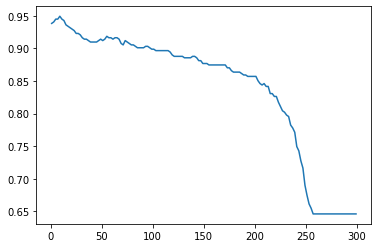

In [77]:
x=[]
y=[]
for k in range(1,300,2):
  clf=KNeighborsClassifier(k)
  x.append(k)
  y.append(np.mean(cross_val_score(clf,X_train,y_train)))

plt.plot(x,y)

In [78]:
## what happens in knn when we have data that is labeled
#if its binary we can directly map the feature to be 0 or 1
#if its increasing in an order we can map it again
#but if it has no order we have to use each label as a feature and then we can have binary output

In [79]:
#kdtrees and other knn methods 

In [111]:
def knn(x_train,y_train,k,weighted_voting,x_test,y_test):
  uniques=np.unique(y_train)
  predictions=[]

  for sample in x_test:
    distances=[]
    for x,y in zip(x_train,y_train):
      distance=np.linalg.norm(sample-x)
      
      distances.append((distance,y))
    distances=sorted(distances,key=lambda x:x[0])[:k]

    if weighted_voting:
      weights=[1/i[0] for i in distances]
      dict_vote={i:0 for i in uniques}
      for i in distances:
          dict_vote[i[1]]+=1
      out=list(dict_vote.items())
      new_out=[]
      for i in range(0,len(out)):
        new_out.append((out[i][0],out[i][1]*weights[i]))

     

      predictions.append(sorted(new_out,key=lambda x:x[1],reverse=True)[0][0])

    else:
      dict_vote={i:0 for i in uniques}
      for i in distances:
          dict_vote[i[1]]+=1
    
      predictions.append(sorted(dict_vote.items(),key=lambda x:x[1],reverse=True)[0][0])

  return np.array(predictions)
  




In [124]:
with_=np.mean(y_test==knn(X_train,y_train,21,True,X_test,y_test))
without_=np.mean(y_test==knn(X_train,y_train,21,False,X_test,y_test))

In [125]:
print(with_,without_)

0.9035087719298246 0.8947368421052632
